<a href="https://colab.research.google.com/github/ScienceMoo/DNA_structure_ML/blob/main/PositiveAndNegative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn; seaborn.set() # Plot styling
from seaborn import heatmap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# actual PWM (you need this later just to compare)
actualPWM = np.array([[0.0540, 0.3180, 0.5660, 0.0620],
    [0.0240, 0.6460, 0.0240, 0.3060],
    [0.0680, 0.0420, 0.7920, 0.0980],
    [0.0420, 0.7900, 0.0620, 0.1060],
    [     0, 0.9940,      0, 0.0060],
    [0.2620, 0.6660, 0.0460, 0.0260],
    [0.0040, 0.6180, 0.0020, 0.3760],
    [     0, 0.9980, 0.0020,      0],
    [0.0320, 0.0640, 0.0080, 0.8960],
    [0.2660, 0.0900, 0.5640, 0.0800],
    [0.0200, 0.3440, 0.6200, 0.0160],
    [0.0800, 0.1940, 0.0440, 0.6820],
    [0.0100, 0.0020, 0.9760, 0.0120],
    [0.0260, 0.0660, 0.8400, 0.0680],
    [0.1260, 0.5940, 0.0740, 0.2060]])

# Read data

In [ ]:
file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "CTCF_sequences.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

sequences = mat['sequences']
sequences = [word[2:33] for word_array in sequences for word in word_array[0]]
sequences = np.array(sequences)
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
print("sequences.shape =", sequences.shape)
print("num_sample =", num_sample)
print("seq_length =", seq_length)
print("")
print("sequences =", sequences[:5])

file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "false_sequences.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

false_sequences = mat['false_sequences']
false_sequences = [word[2:33] for word_array in false_sequences for word in word_array[0]]
false_sequences = np.array(false_sequences)
num_false_seq = false_sequences.shape[0]
print("false_sequences.shape =", false_sequences.shape)
print("num_false_seq =", num_false_seq)
print("seq_length =", seq_length)
print("")
print("false_sequences =", false_sequences[:5])

file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "CTCF_strengths.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

strengths = mat['TF_scores']
strengths = strengths
strengths = [thing[0] for thing in strengths]
y = np.array(strengths)
print("")
print("y.shape =", y.shape)
print("y =", y[:10])

sequences.shape = (158004, 31)
num_sample = 158004
seq_length = 31

sequences = [['T' 'G' 'G' 'C' 'A' 'C' 'A' 'A' 'A' 'A' 'C' 'C' 'C' 'C' 'T' 'C' 'T' 'G'
  'C' 'T' 'G' 'G' 'C' 'T' 'C' 'G' 'T' 'G' 'T' 'G' 'T']
 ['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'G' 'C' 'C' 'C' 'C' 'C' 'A' 'A'
  'G' 'G' 'G' 'C' 'A' 'T' 'C' 'T' 'T' 'C' 'T' 'C' 'A']
 ['T' 'T' 'C' 'T' 'C' 'T' 'G' 'T' 'G' 'T' 'G' 'G' 'C' 'A' 'C' 'C' 'A' 'G'
  'G' 'T' 'G' 'G' 'C' 'A' 'G' 'C' 'A' 'G' 'A' 'G' 'G']
 ['G' 'A' 'C' 'C' 'T' 'C' 'T' 'G' 'C' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'T' 'G'
  'G' 'T' 'G' 'C' 'C' 'A' 'C' 'A' 'C' 'A' 'G' 'A' 'G']
 ['T' 'T' 'G' 'C' 'C' 'T' 'T' 'G' 'C' 'T' 'G' 'A' 'C' 'C' 'T' 'C' 'T' 'G'
  'C' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'T' 'G' 'G' 'T' 'G']]
false_sequences.shape = (160135, 31)
num_false_seq = 160135
seq_length = 31

false_sequences = [['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'A' 'A'
  'G' 'G' 'G' 'C' 'A' 'T' 'C' 'T' 'T' 'C' 'T' 'C' 'A']
 ['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'G' 'C' 

In [ ]:
# Clean the data
inds = []
for idx, sequence in enumerate(sequences):
  if 'N' in sequence:
    inds.append(idx)

sequences = np.delete(sequences, inds, axis=0)
y = np.delete(y, inds, axis=0)

inds_outliers = np.where(y < 1.3)
sequences = np.delete(sequences, inds_outliers, axis=0)
y = np.delete(y, inds_outliers, axis=0)

inds_outliers = np.where(y >= 4)
sequences = np.delete(sequences, inds_outliers, axis=0)
y = np.delete(y, inds_outliers, axis=0)

num_sample, seq_length = sequences.shape[0], sequences.shape[1]

print("num_sample =", num_sample)
print("seq_length =", seq_length)
print("y.shape =", y.shape)

print("sequences.shape =", sequences.shape)

inds = []
for idx, sequence in enumerate(false_sequences):
  if 'N' in sequence:
    inds.append(idx)

false_sequences = np.delete(false_sequences, inds, axis=0)
false_sequences = false_sequences[0:num_sample]

num_false_seq = false_sequences.shape[0]
print("num_false_seq =", num_false_seq)

num_sample = 154271
seq_length = 31
y.shape = (154271,)
sequences.shape = (154271, 31)
num_false_seq = 154271


# Prepare data

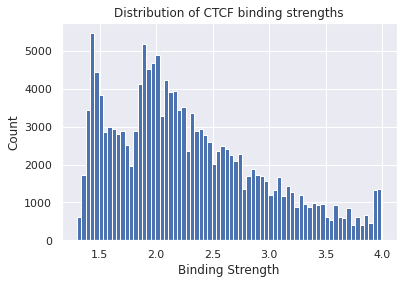

1.3
3.99


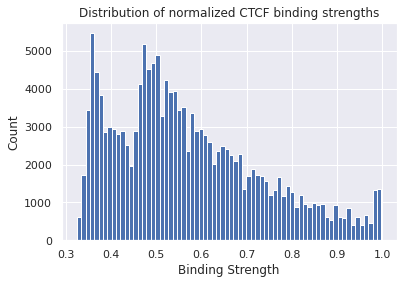

0.325
0.9975


In [ ]:
# Normalize target values
plt.hist(y, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of CTCF binding strengths")
plt.show()
print(min(y))
print(max(y))
y_normalized = y / 4
plt.hist(y_normalized, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of normalized CTCF binding strengths")
plt.show()
print(min(y_normalized))
print(max(y_normalized))

Training set shape: (308542, 31, 4)
Training set label shape: (308542,)

One-hot encoding looks like:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


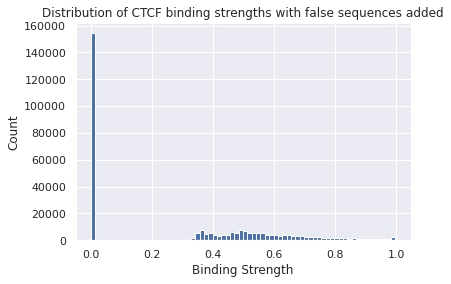

In [ ]:
# one-hot encoding
X = np.zeros(list(sequences.shape) + [4])
# random_X = np.zeros(list(rand_seq.shape) + [4])
false_X = np.zeros(list(false_sequences.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for row in range(num_sample):
    for col in range(seq_length):
        X[row,col,base_dict[sequences[row,col]]] = 1

# for row in range(num_negative_data):
#     for col in range(seq_length):
#         random_X[row,col,base_dict[rand_seq[row,col]]] = 1

for row in range(num_false_seq):
    for col in range(seq_length):
        false_X[row,col,base_dict[false_sequences[row,col]]] = 1

# Combine real data with random sequences
# X = np.vstack((X, random_X))
# y = np.concatenate((y, np.zeros(num_negative_data)))

# X = np.vstack((X, random_X, false_X))
# y = np.concatenate((y, np.zeros(num_negative_data + num_false_seq)))

X = np.vstack((X, false_X))
y = np.concatenate((y_normalized, np.zeros(num_false_seq)))

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

plt.hist(y, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of CTCF binding strengths with false sequences added")
plt.show()

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05)

# Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras

def clip_relu (x): 
    return keras.activations.relu(x, max_value=1.05, alpha=0.1, threshold=0.31)

def other_relu (x): 
    return keras.activations.relu(x, max_value=1.05, threshold=-0.2)

# define the model
model = Sequential()
model.add(Conv1D(128, 25, padding='same', activation=other_relu, input_shape=(seq_length, 4)))
# model.add(Conv1D(32, 8, padding='same', activation=other_relu))
#sanity check for dimensions
print('Shape of the output of first layer: {}'.format(model.predict_on_batch(X[0:32,:,:]).shape))
# model.add(MaxPooling1D(2))

# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation=clip_relu))

# sgd = SGD(lr=0.0001, decay=1e-8, momentum=0.9, nesterov=True)
sgd = SGD(lr=0.00005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

hist = model.fit(X, y, validation_split=0.3, epochs=30, batch_size=50)  # starts training
model.evaluate(X_test, y_test)

model.summary()

Shape of the output of first layer: (32, 31, 128)
Epoch 1/30
4104/4104 [==============================] - 40s 10ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - val_loss: 0.1435 - val_mean_absolute_error: 0.1435
Epoch 2/30
4104/4104 [==============================] - 39s 10ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - val_loss: 0.0943 - val_mean_absolute_error: 0.0943
Epoch 3/30
4104/4104 [==============================] - 39s 10ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - val_loss: 0.0758 - val_mean_absolute_error: 0.0758
Epoch 4/30
4104/4104 [==============================] - 39s 10ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - val_loss: 0.0676 - val_mean_absolute_error: 0.0676
Epoch 5/30
4104/4104 [==============================] - 39s 10ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - val_loss: 0.0640 - val_mean_absolute_error: 0.0640
Epoch 6/30
4104/4104 [==============================] - 40s 10ms/step - loss: 0.0625 - mean_absolute_error: 0.

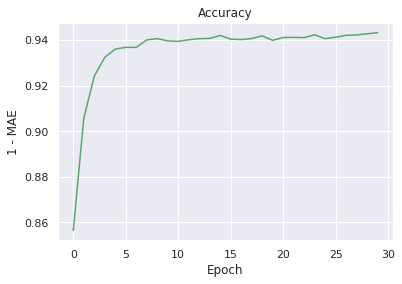

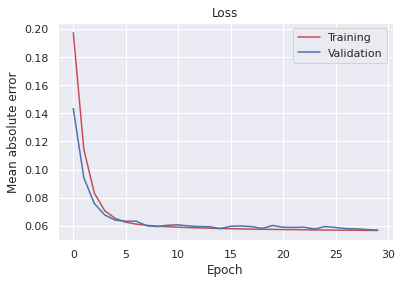

In [ ]:
arr = 1 - np.array(hist.history['val_mean_absolute_error'])

plt.plot(hist.epoch, arr, 'g')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("1 - MAE")
plt.show()

plt.plot(hist.epoch, hist.history['loss'], 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean absolute error")
plt.legend()
plt.show()

Convolution parameter shape: (25, 4, 128)
[[-2.3016790e-03  1.7988367e-03 -6.7056564e-04  5.0185444e-03
   4.8179659e-03  2.7230121e-03  3.6493698e-03 -3.6632693e-03
  -6.6972943e-04 -3.1286839e-04  5.0197570e-03  1.1508493e-04
  -2.1890341e-04 -9.4010140e-04  4.9764529e-04  1.8041016e-03
   4.2086127e-03  1.2526982e-03 -2.0681066e-03  3.3559888e-03
  -4.4544581e-03 -2.1316455e-04 -1.2399157e-03 -1.0465647e-03
   1.3121596e-03]
 [ 2.3551851e-03  2.0268746e-03  3.8350257e-03  1.3966649e-03
   3.6410121e-03 -8.7907963e-04  1.8962208e-03  5.5415193e-03
   3.4724455e-03  5.5846153e-03  2.1963022e-03  6.6569081e-04
   4.7045490e-03  8.0485659e-04  1.4140257e-03  1.6417061e-03
   1.8505191e-03 -6.1046546e-03  7.7998918e-04  2.5419546e-03
   4.2042171e-05  1.6617357e-03  3.0593099e-03  2.6490784e-03
  -5.1809382e-04]
 [-1.0004662e-03 -1.3766810e-05  4.7050463e-03 -1.7339999e-03
  -3.1867265e-03  1.5860447e-03 -4.1483092e-04  6.2616845e-03
   1.9751312e-03  7.8014022e-04  3.5678912e-03  1.7412

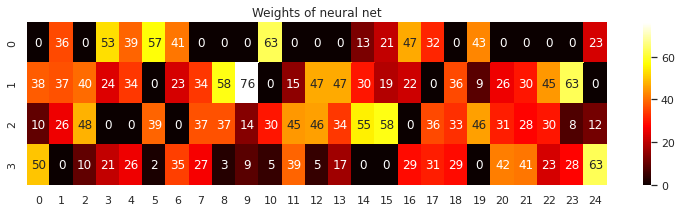

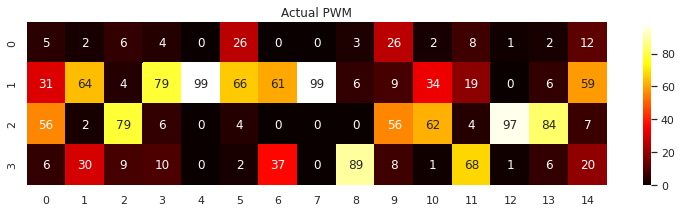

In [ ]:
def my_softmax(row):
  if min(row) != 0:
    row = row - min(row)
  return row / sum(row)
  
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))
# weights = np.apply_along_axis(my_softmax, 1, weights)
weights = np.mean(np.transpose(weights), 0)
print(weights)
weights = np.transpose(weights)
weights = np.apply_along_axis(my_softmax, 1, weights)

weights = weights * 100
weights = weights.astype(int)

fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose(weights),  annot=True, fmt="d", cmap="hot")
plt.title("Weights of neural net")
plt.show()


fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose((actualPWM * 100).astype(int)), annot=True, fmt="d", cmap="hot")
plt.title("Actual PWM")
plt.show()

In [ ]:
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(actualPWM[i,:])] for i in range(actualPWM.shape[0])])  

'GCGCCCCCTGGTGGC'

In [ ]:
# predict highest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])  

'CCGCCCCCTCGGGGG'

In [ ]:
# predict lowest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmin(weights[i,:])] for i in range(8, weights.shape[0]-8)])

'ATATGAGATCCAGAA'

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

reds = cm.get_cmap('YlOrRd')
print(reds(1))

(1.0, 0.9977854671280277, 0.7945866974240677, 1.0)


[[1.         0.94906574 0.67549404 1.        ]
 [1.         0.9867128  0.76752018 1.        ]
 [1.         0.9933564  0.78376009 1.        ]
 ...
 [0.99986159 0.9266436  0.62163783 1.        ]
 [1.         0.99114187 0.77834679 1.        ]
 [1.         0.98892734 0.77293349 1.        ]]


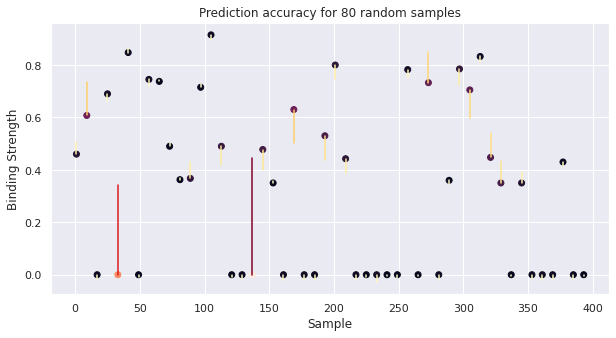

In [ ]:


# Test the model
pred = model.predict(X_test)
# pred = model.predict(X)

pred = pred.reshape((pred.shape[0],))

fig=plt.figure(figsize=(10, 5))

colrs = [abs(y_test[i]-pred[i]) for i in range(0, 399, 8)]

minc = min(colrs)
colrs = colrs - min(colrs)
maxc = max(colrs)
colrs = colrs / max(colrs)



full_colrs = [abs(y_test[i]-pred[i]) for i in range(pred.shape[0])]

full_colrs = full_colrs - minc
full_colrs = full_colrs / maxc

colrs_mapped = reds(full_colrs)



plt.scatter(np.arange(1,400, 8), y_test[0:399:8], c=colrs)
# plt.scatter(np.arange(1,400, 8), pred[0:399:8], label="Prediction")

# colrs = []
# for i in range(pred.shape[0]):
#   if abs(pred[i]-y_test[i]) < 0.05:
#     colrs.append('red')
#   elif abs(pred[i]-y_test[i]) < 0.2:
#     colrs.append('red')
#   else:
#     colrs.append('red')



print(colrs_mapped)

for i in range(0, 399, 8):
  plt.plot([i+1, i+1], [pred[i], y_test[i]], c=colrs_mapped[i])
plt.xlabel('Sample')
plt.ylabel('Binding Strength')
plt.title('Prediction accuracy for 80 random samples')
# plt.legend(loc='upper left')
plt.show()

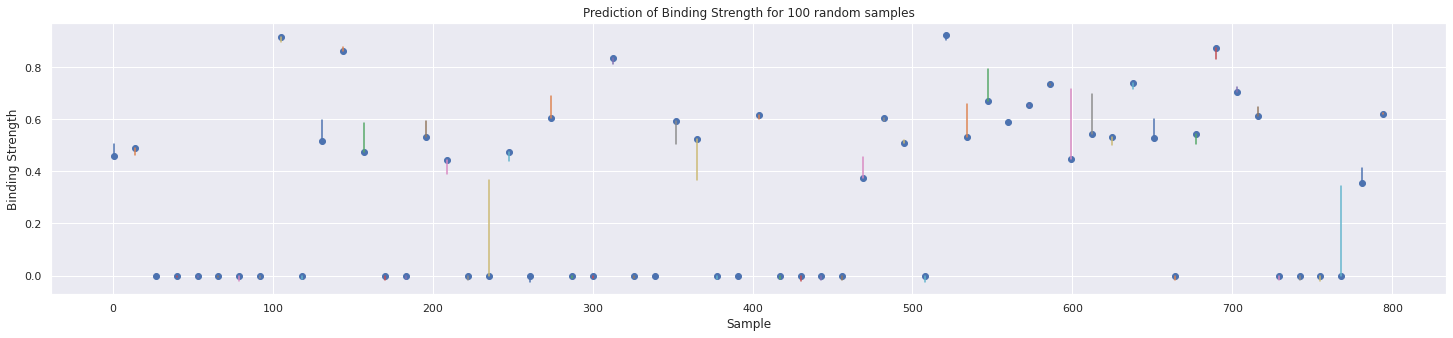

In [ ]:


fig=plt.figure(figsize=(25, 5))

plt.scatter(np.arange(1,800, 13), y_test[0:799:13])

# plt.scatter(np.arange(1,800, 8), pred[0:799:8], label="Prediction")

for i in range(0, 799, 13):
  plt.plot([i+1, i+1], [pred[i], y_test[i]])
  # plt.plot([i+1, i+1], [pred[i], y[i]], 'b')
plt.xlabel('Sample')
plt.ylabel('Binding Strength')
plt.title('Prediction of Binding Strength for 100 random samples')
# plt.legend(loc='upper left')
plt.show()

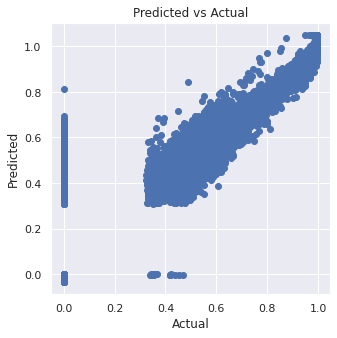

In [ ]:
fig=plt.figure(figsize=(5, 5))
plt.scatter(y_test, pred)
# plt.scatter(y, pred)
# Plot

plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

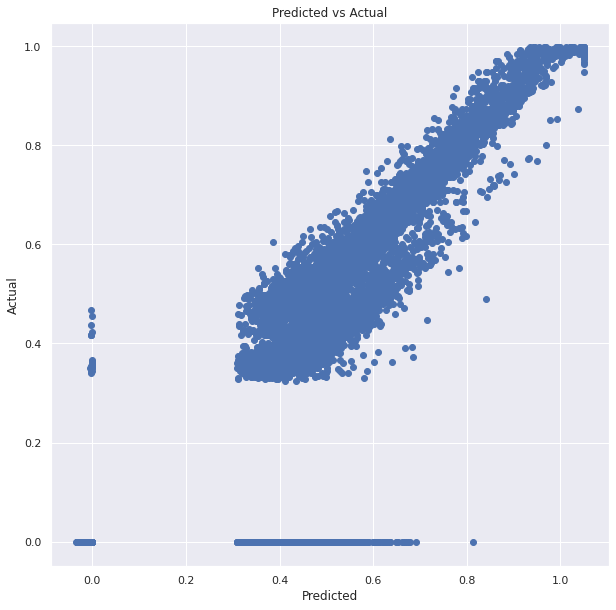

In [ ]:
fig=plt.figure(figsize=(10, 10))
plt.scatter(pred, y_test)
# plt.scatter(pred, y)
# Plot
plt.title('Predicted vs Actual')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

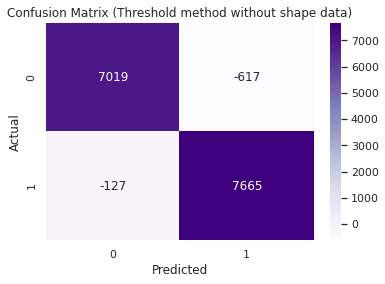

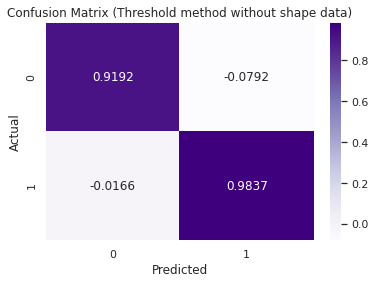

In [ ]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

for i in range(pred.shape[0]):
  if pred[i] > 0.34 and y_test[i] > 0:
    true_positives += 1
  elif pred[i] < 0.35 and y_test[i] > 0:
    false_negatives += 1
  elif pred[i] >= 0.35 and y_test[i] == 0:
    false_positives += 1
  elif pred[i] < 0.35 and y_test[i] == 0:
    true_negatives += 1

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt="d", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Threshold method without shape data)')
plt.show()


total_positive = (true_positives + false_negatives)
total_negative = (true_negatives + false_positives)

true_positives = true_positives / total_positive
false_positives = false_positives / total_positive
true_negatives = true_negatives / total_negative
false_negatives = false_negatives / total_negative

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt=".4f", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Threshold method without shape data)')
plt.show()